In [1]:
import pandas as pd

In [2]:
raw_csv_data = pd.read_csv('Absenteeism-data.csv')

In [3]:
df = raw_csv_data.copy()

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
ID                           700 non-null int64
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [6]:
df = df.drop(['ID'], axis = 1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [7]:
df['Reason for Absence'].min()

0

In [8]:
df['Reason for Absence'].max()

28

In [9]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [10]:
len(df['Reason for Absence'].unique())

28

In [11]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [12]:
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
reason_columns['check'] = reason_columns.sum(axis = 1)
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [14]:
reason_columns['check'].sum(axis = 0)

700

In [15]:
reason_columns['check'].unique()

array([1], dtype=int64)

In [16]:
reason_columns = reason_columns.drop(['check'], axis = 1)
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [19]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [20]:
df = df.drop(['Reason for Absence'], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [21]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis = 1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis = 1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis = 1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis = 1)

In [22]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [23]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [24]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [25]:
df.columns = column_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [26]:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [27]:
df = df[column_names_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


CHECKPOINT

In [28]:
df_reason_mod = df.copy()
df_reason_mod.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,0,0,0,1,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,0,0,0,1,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,0,0,0,1,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,0,0,1,0,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,0,0,0,1,13/07/2015,235,11,37,239.554,29,3,1,1,8


In [29]:
type(df_reason_mod['Date'][0])

str

In [30]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')
df_reason_mod['Date'].head()

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
Name: Date, dtype: datetime64[ns]

In [31]:
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
Reason_1                     700 non-null uint8
Reason_2                     700 non-null uint8
Reason_3                     700 non-null uint8
Reason_4                     700 non-null uint8
Date                         700 non-null datetime64[ns]
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), uint8(4)
memory usage: 57.5 KB


In [33]:
df_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [34]:
df_reason_mod['Date'][0].month

7

In [35]:
list_months = []

In [36]:
df_reason_mod.shape

(700, 14)

In [37]:
for i in range(df_reason_mod.shape[0]):
    list_months.append(df_reason_mod['Date'][i].month)

In [38]:
len(list_months)

700

In [39]:
df_reason_mod['Month Value'] = list_months
df_reason_mod.head(20)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
5,0,0,0,1,2015-07-10,179,51,38,239.554,31,1,0,0,2,7
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8,7
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4,7
8,0,0,1,0,2015-07-06,155,12,34,239.554,25,1,2,0,40,7
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8,7


In [40]:
df_reason_mod['Date'][699].weekday()

3

In [41]:
df_reason_mod['Date'][699]

Timestamp('2018-05-31 00:00:00')

In [42]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [43]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [44]:
df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3


In [45]:
df_reason_mod.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week'], dtype=object)

In [46]:
column_names_updated = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [47]:
df_reason_mod = df_reason_mod[column_names_updated]
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


CHECKPOINT

In [48]:
df_reason_date_mod = df_reason_mod.copy()
df_reason_date_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [49]:
type(df_reason_date_mod['Transportation Expense'][0])

numpy.int64

In [50]:
type(df_reason_date_mod['Distance to Work'][0])

numpy.int64

In [51]:
type(df_reason_date_mod['Age'][0])

numpy.int64

In [52]:
type(df_reason_date_mod['Daily Work Load Average'][0])

numpy.float64

In [53]:
type(df_reason_date_mod['Body Mass Index'][0])

numpy.int64

In [54]:
df_reason_date_mod['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [55]:
df_reason_date_mod['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [56]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})

In [57]:
df_reason_date_mod['Education'].unique()

array([0, 1], dtype=int64)

In [58]:
df_reason_date_mod['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

FINAL CHECKPOINT

In [59]:
df_preprocessed = df_reason_date_mod.copy()
df_preprocessed.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
5,0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2
6,0,0,0,1,7,4,361,52,28,239.554,27,0,1,4,8
7,0,0,0,1,7,4,260,50,36,239.554,23,0,4,0,4
8,0,0,1,0,7,0,155,12,34,239.554,25,0,2,0,40
9,0,0,0,1,7,0,235,11,37,239.554,29,1,1,1,8


In [60]:
df_preprocessed.corr()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
Reason_1,1.000000,-0.053683,-0.181568,-0.702915,-0.002826,-0.078055,0.008725,-0.098625,0.022772,0.165434,-0.077597,0.095056,-0.061594,-0.054502,0.282919
Reason_2,-0.053683,1.000000,-0.029241,-0.113203,-0.018406,-0.011194,-0.000487,-0.022372,0.030381,-0.016664,-0.078084,0.124487,0.081867,-0.041531,-0.012936
Reason_3,-0.181568,-0.029241,1.000000,-0.382881,-0.013796,-0.103661,0.016658,-0.023367,-0.019797,0.014542,-0.038087,0.046426,0.088256,0.105854,0.204242
Reason_4,-0.702915,-0.113203,-0.382881,1.000000,-0.036989,0.110696,-0.066727,0.130687,-0.062765,-0.163826,0.071160,-0.108243,-0.049680,-0.013062,-0.307408
Month Value,-0.002826,-0.018406,-0.013796,-0.036989,1.000000,0.071718,0.135803,-0.003970,0.004983,-0.174029,0.058254,-0.075561,0.082057,0.076250,0.017625
Day of the Week,-0.078055,-0.011194,-0.103661,0.110696,0.071718,1.000000,0.048516,0.089484,0.004039,0.012573,-0.071750,0.037951,0.111936,-0.045163,-0.119068
Transportation Expense,0.008725,-0.000487,0.016658,-0.066727,0.135803,0.048516,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.019623,0.381749,0.446887,0.008342
Distance to Work,-0.098625,-0.022372,-0.023367,0.130687,-0.003970,0.089484,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.289994,0.048534,0.171585,-0.080593
Age,0.022772,0.030381,-0.019797,-0.062765,0.004983,0.004039,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.219723,0.046930,-0.252067,0.035784
Daily Work Load Average,0.165434,-0.016664,0.014542,-0.163826,-0.174029,0.012573,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.058990,0.032194,0.010490,0.029609


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')

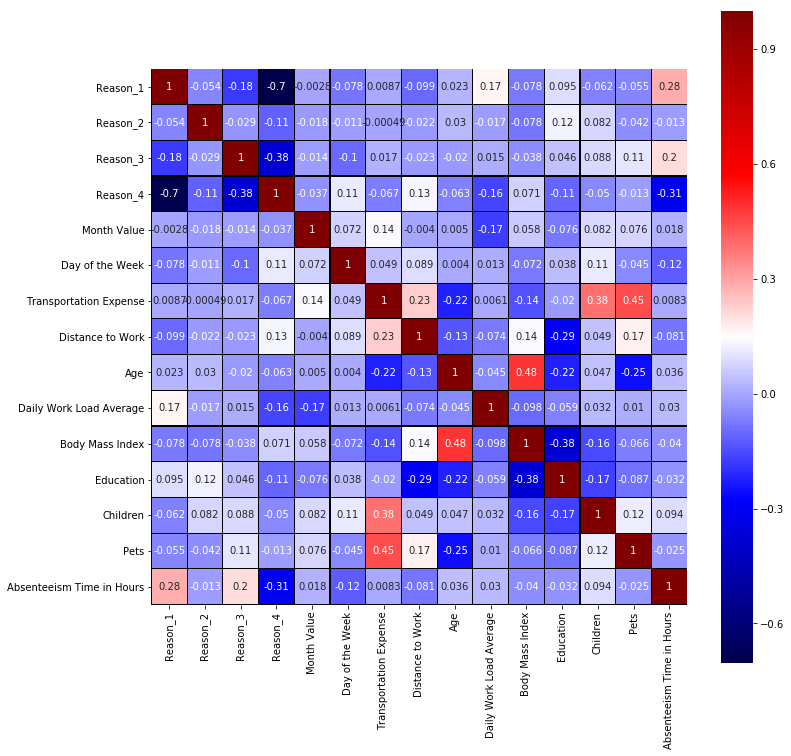

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(df_preprocessed.corr(),
            linewidths = 0.25,
            square = True,
            cmap = 'seismic',
            linecolor = 'black',
            annot = True);